# Data Rangling project

## Step 1: Importing tools and libraries

In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json


## Step 2: Gathering data

1- get all the files ready for work

In [2]:
#save the image_prediction.tsv file
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_prediction = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(image_prediction.content)
    
url_2 ='https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
f = requests.get(url_2)
with open(url_2.split('/')[-1], mode='wb') as file:
    file.write(f.content)

    
# I also uploaded the twitter-archive-enhanced.csv file

2- covert the files to pandas dataframes

In [3]:
df = pd.read_csv('twitter-archive-enhanced.csv')

df_image = pd.read_csv('image-predictions.tsv', sep = '\t')

#with open('tweet-json.txt') as json_file:
#    data = json.load(json_file)
    
tweets = []
df_list = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))
for i in tweets:
    favorite_count = i['favorite_count']
    i_d = i['id']
    retweet_count =i['retweet_count']
    
    
    df_list.append({'tweet_id': i_d, 'favorite_count': favorite_count, 'retweet_count': retweet_count})    


df_third = pd.DataFrame(df_list) 



## Step 3: Assessing data

Find at least eight (8) quality issues and two (2) tidiness issues.

### Assess df dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Quality problems found:
- Many names are missing and represented as'None', the same issue is present in other columns as well, hence, None values should be converted to NaN (Done)
- Rating_denominator (always 10): redundant column (unnecessary) (Done)
- Some columns have informations that are not valuable for us like:
retweeted_status_id / retweeted_status_user_id / retweeted_status_timestamp / in_reply_to_status_id / in_reply_to_user_id (Done)
- some invalid names like 'an', 'one', 'not', 'this', 'a','space', 'The' and 'light. (Done)
- Time stamp should be converted to datatime. (Done)
- tweet_id should be string type (Done)
- rating_numerator below 10 are invalid.
- outliers in the rating_numerator column.

Tidiness problems found:
- This table should be joined with df_third table Keeping only the Tweets that have images in the image dataframe (Done).
- doggo, floofer, pupper, puppo columns can be combined into one column (Done).
- Duplicate column: expanded_urls can be extracted from tweet_id easily (Done)
- text column contains urls which should be extracted (Done).


### Assessing image dataframe

In [5]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Quality Issues:
- tweet_id column shoud be string value.(Done)


Tideness Issues:
- Not found

### Assessing df_third dataframe

In [6]:
df_third.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


Quality problems:
- favorite_count, retweet_count should be integer type values (Done)
- tweet_id column shoud be string value (Done)

Tideness Problems:
- This table should be joined with df table Keeping only the Tweets that have images in the image dataframe (Done).



## Step 4: Cleaning data

#### Define (Missing Values Issue)
- Null values are expressed as 'None'

#### Code:


In [7]:
df.replace(to_replace=['None'], value=np.nan, inplace=True)

#### Test:


In [8]:
df.info()
df.name.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(3), object(10

a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Tucker      10
Lola        10
Penny       10
Bo           9
Winston      9
the          8
Sadie        8
Toby         7
Bailey       7
Daisy        7
an           7
Buddy        7
Leo          6
Bella        6
Stanley      6
Milo         6
Koda         6
Dave         6
Scout        6
Rusty        6
Oscar        6
Jack         6
Jax          6
Chester      5
Sunny        5
            ..
Willy        1
Tango        1
Butters      1
Carll        1
Acro         1
Zoe          1
Comet        1
Hermione     1
Lizzie       1
Tyrus        1
Gòrdón       1
Lambeau      1
Alf          1
Theo         1
Puff         1
DayZ         1
General      1
Angel        1
Kaia         1
Pilot        1
Sparky       1
Flurpson     1
Brooks       1
Staniel      1
Heinrich     1
Creg         1
O            1
Jomathan     1
Napolean     1
Eugene       1
Name: name, Length: 956, dtype: int64

#### Define (First Tidiness issue):
- df table should be joined with df table Keeping only the Tweets that have images in the image dataframe.

#### Code:


In [9]:
#merging df and df_third into one table
merged =  pd.merge(df, df_third, on='tweet_id', how='left' )

# Keeping only the Tweets that have images in the image dataframe
tweet_ids = list(df_image.tweet_id)
merged = merged.where(merged.tweet_id.isin(tweet_ids) == True)
merged = merged[merged['tweet_id'].notna()].reset_index()

#### Test:

In [10]:
merged.info()
merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 20 columns):
index                         2075 non-null int64
tweet_id                      2075 non-null float64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null float64
rating_denominator            2075 non-null float64
name                          1497 non-null object
doggo                         80 non-null object
floofer                       8 non-null object
pupper                        222 non-null object
puppo                         24 non

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,39467.0,8853.0
1,1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,33819.0,6514.0
2,2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN,25461.0,4328.0
3,3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,NaN,NaN,42908.0,8964.0
4,4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN,41048.0,9774.0


### Define (second tidiness issue):
- doggo, floofer, pupper, puppo columns can be combined into one column.

### Code:


In [11]:
merged_stage = []
for i in range(len(merged)):
    if merged.loc[i,'doggo'] == 'doggo':
        merged_stage.append('doggo')
    elif merged.loc[i, 'floofer'] == 'floofer':
        merged_stage.append('floofer')
    elif merged.loc[i, 'pupper'] == 'pupper':
        merged_stage.append('pupper')
    elif merged.loc[i, 'puppo'] == 'puppo':
        merged_stage.append('puppo')
    else:
        merged_stage.append(np.nan)
        
merged['stage'] = merged_stage
merged.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#test
merged.head(10)


,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,stage
0,0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,39467.0,8853.0,NaN
1,1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,33819.0,6514.0,NaN
2,2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,25461.0,4328.0,NaN
3,3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,42908.0,8964.0,NaN
4,4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,41048.0,9774.0,NaN
5,5,8.910880e+17,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,20562.0,3261.0,NaN
6,6,8.909719e+17,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,12041.0,2158.0,NaN
7,7,8.907292e+17,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,56848.0,16716.0,NaN
8,8,8.906092e+17,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,28226.0,4429.0,NaN
9,9,8.902403e+17,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,32467.0,7711.0,doggo


#### Define (Third tidiness problem):
- Duplicate column: expanded_urls can be extracted from tweet_id easily.
- text column contains ratings and url which should be removed.

#### Code:


In [12]:
merged.drop(columns=['expanded_urls'], inplace = True)


In [13]:
text = merged['text'].str.split("http", n= 2, expand = True)[0]
url_1 = 'http' + merged['text'].str.split("http", n= 2, expand = True)[1]
url_2 = 'http' + merged['text'].str.split("http", n= 2, expand = True)[2]
merged['text'] = text
merged['photo_url_1'] =url_1
merged['photo_url_2'] =url_2

In [14]:
#test
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 18 columns):
index                         2075 non-null int64
tweet_id                      2075 non-null float64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
rating_numerator              2075 non-null float64
rating_denominator            2075 non-null float64
name                          1497 non-null object
favorite_count                2073 non-null float64
retweet_count                 2073 non-null float64
stage                         321 non-null object
photo_url_1                   2075 non-null object
photo_url_2                  

#### Define:

- Rating_denominator (always 10): redundant column (unnecessary) (Done)
- Some columns have informations that are not valuable for us like:
retweeted_status_id / retweeted_status_user_id / retweeted_status_timestamp / in_reply_to_status_id / in_reply_to_user_id (Done)


#### Code:

In [15]:
merged.drop(columns=['rating_denominator', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], inplace = True)

#### Test

In [16]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
index               2075 non-null int64
tweet_id            2075 non-null float64
timestamp           2075 non-null object
source              2075 non-null object
text                2075 non-null object
rating_numerator    2075 non-null float64
name                1497 non-null object
favorite_count      2073 non-null float64
retweet_count       2073 non-null float64
stage               321 non-null object
photo_url_1         2075 non-null object
photo_url_2         29 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 194.6+ KB


#### Define:
- some invalid names like 'an', 'one', 'not', 'this', 'a','space', 'The' and 'light.

#### Code :

In [17]:
merged.name.replace(to_replace=['a', 'an', 'not', 'one', 'space', 'light', 'The'], value=np.nan, inplace=True)

#### Test

In [18]:
merged.name.value_counts()

Charlie     11
Tucker      10
Oliver      10
Lucy        10
Cooper      10
Penny       10
Lola         8
Winston      8
Bo           8
Sadie        8
the          7
Daisy        7
Toby         7
Rusty        6
Jax          6
Bailey       6
Dave         6
Milo         6
Bella        6
Koda         6
Scout        6
Stanley      6
Leo          5
Buddy        5
Larry        5
Alfie        5
Chester      5
Oscar        5
Louis        5
Phil         4
            ..
Bobb         1
Ike          1
Barney       1
Lambeau      1
Alf          1
Rufio        1
Schnozz      1
Winifred     1
Beya         1
Trevith      1
Bert         1
Nico         1
Clarq        1
Duddles      1
Tuck         1
Fido         1
Storkson     1
Nida         1
Tito         1
Clybe        1
Diogi        1
Jerome       1
Goliath      1
Eriq         1
Dook         1
Lupe         1
Brownie      1
Jaspers      1
Trigger      1
Eugene       1
Name: name, Length: 929, dtype: int64

#### Define (Invalid Types):
- Time stamp should be converted to datatime (merged dataframe)
- tweet_id should be string type (merged and image dataframes)
- Filling missing values in favorite_count, retweet_count wit zeros
- favorite_count, retweet_count should be integer type values (merged daraframe).

#### Code:


In [19]:
merged['timestamp'] = pd.to_datetime(merged['timestamp'])
merged['tweet_id'] = str(merged['tweet_id'])
df_image['tweet_id'] = str(df_image['tweet_id'])
merged['favorite_count'] = merged['favorite_count'].fillna(0.0).astype(int)
merged['retweet_count'] = merged['retweet_count'].fillna(0.0).astype(int)


In [20]:
#test
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
index               2075 non-null int64
tweet_id            2075 non-null object
timestamp           2075 non-null datetime64[ns]
source              2075 non-null object
text                2075 non-null object
rating_numerator    2075 non-null float64
name                1428 non-null object
favorite_count      2075 non-null int64
retweet_count       2075 non-null int64
stage               321 non-null object
photo_url_1         2075 non-null object
photo_url_2         29 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 194.6+ KB


In [21]:
#test
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define:
- photo_url_1 and photo_url_2 should be removed as they exist in the image dataframe (Duplicate data)
- rating_numerator below 10 are invalid, theses vaues will be removed.

#### Code:



In [22]:
merged.drop(columns=['photo_url_1', 'photo_url_2'], inplace = True)

In [23]:
merged = merged[merged['rating_numerator'] >= 10]

In [24]:
# Test
merged.rating_numerator.value_counts()

12.0      474
10.0      429
11.0      413
13.0      284
14.0       40
80.0        1
15.0        1
84.0        1
24.0        1
27.0        1
204.0       1
50.0        1
143.0       1
420.0       1
60.0        1
44.0        1
26.0        1
144.0       1
88.0        1
165.0       1
75.0        1
1776.0      1
99.0        1
121.0       1
45.0        1
Name: rating_numerator, dtype: int64

In [25]:
##Save the databases
merged.to_csv('twitter_archive_master.csv')
df_image.to_csv('image-predictions_master.csv')

## Analysis of the data:

In [26]:
merged.info()
df_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 0 to 2069
Data columns (total 10 columns):
index               1660 non-null int64
tweet_id            1660 non-null object
timestamp           1660 non-null datetime64[ns]
source              1660 non-null object
text                1660 non-null object
rating_numerator    1660 non-null float64
name                1169 non-null object
favorite_count      1660 non-null int64
retweet_count       1660 non-null int64
stage               277 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 142.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null

Analysis of average rating for different stages:


{'doggo': 12.105263157894736, 'puppo': 12.136363636363637, 'pupper': 11.395348837209303, 'floofer': 12.0}


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  from ipykernel import kernelapp as app


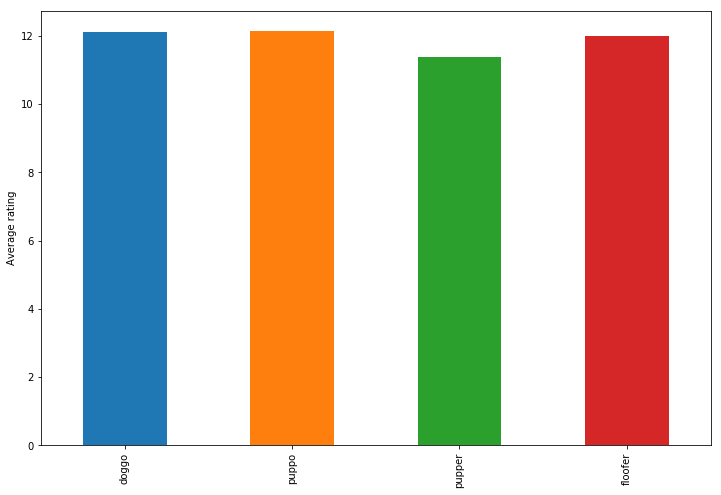

In [27]:
## A function that gets that averge rating for each stage.
def average_rating(df):
    av_rating= {}
    stages = df.stage.unique()
    stages = [x for x in stages if str(x) != 'nan']
    for i in stages:
        rating = df[df['stage'] == i].rating_numerator.mean()
        av_rating[i] = rating
    return av_rating

rattings_per_stage = average_rating(merged)
print(rattings_per_stage)

##plotting
freq_series = pd.Series.from_array(rattings_per_stage)
plt.figure(figsize=(12, 8))
fig = freq_series.plot(kind='bar')
fig.set_ylabel('Average rating')
plt.show()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


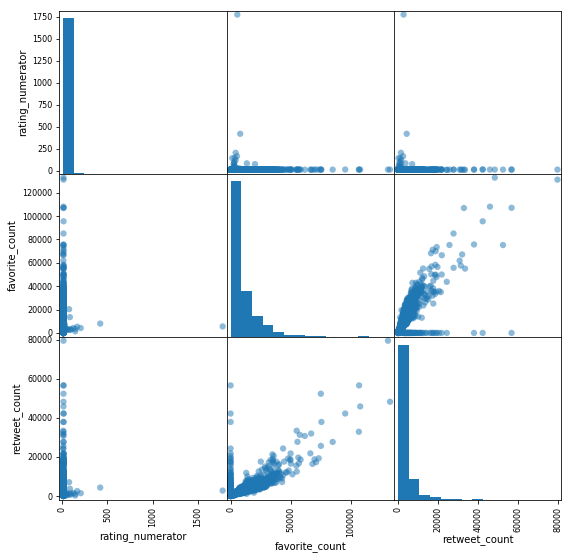

In [28]:
columns = ['rating_numerator', 'favorite_count', 'retweet_count']
scatter = pd.scatter_matrix(merged[columns], marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9))

In [29]:
merged.describe()

,index,rating_numerator,favorite_count,retweet_count
count,1660.000000,1660.000000,1660.000000,1660.000000
mean,1085.792771,13.531928,9973.615060,3458.157831
std,662.541510,45.384522,12997.185668,5502.880791
min,0.000000,10.000000,0.000000,0.000000
25%,517.750000,10.000000,2261.000000,789.250000
50%,1047.500000,11.000000,5104.000000,1843.000000
75%,1633.250000,12.000000,13143.750000,3942.000000
max,2350.000000,1776.000000,132810.000000,79515.000000


{'doggo': 18057.157894736843, 'puppo': 21433.136363636364, 'pupper': 7684.4767441860467, 'floofer': 13206.0}


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  


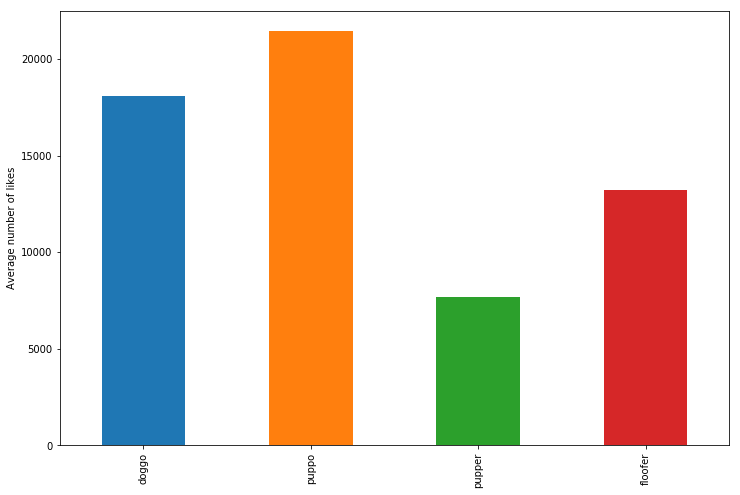

In [30]:
def average_likes(df):
    av_rating= {}
    stages = df.stage.unique()
    stages = [x for x in stages if str(x) != 'nan']
    for i in stages:
        rating = df[df['stage'] == i].favorite_count.mean()
        av_rating[i] = rating
    return av_rating

likes_per_stage = average_likes(merged)
print(likes_per_stage)

##plotting
freq_series_2 = pd.Series.from_array(likes_per_stage)
plt.figure(figsize=(12, 8))
fig = freq_series_2.plot(kind='bar')
fig.set_ylabel('Average number of likes')
plt.show()


{'doggo': 7925.3157894736842, 'puppo': 6691.227272727273, 'pupper': 2719.6686046511627, 'floofer': 4968.7142857142853}


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  


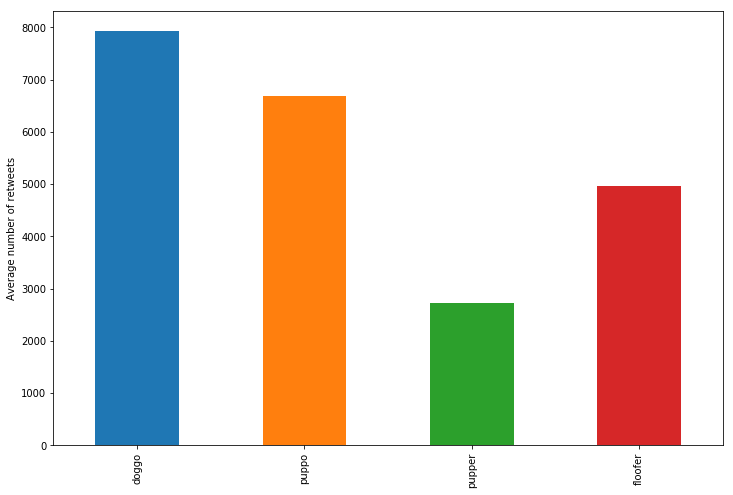

In [31]:
def average_retweets(df):
    av_rating= {}
    stages = df.stage.unique()
    stages = [x for x in stages if str(x) != 'nan']
    for i in stages:
        rating = df[df['stage'] == i].retweet_count.mean()
        av_rating[i] = rating
    return av_rating

retweets_per_stage = average_retweets(merged)
print(retweets_per_stage)

##plotting
freq_series_3 = pd.Series.from_array(retweets_per_stage)
plt.figure(figsize=(12, 8))
fig = freq_series_3.plot(kind='bar')
fig.set_ylabel('Average number of retweets')
plt.show()


In [32]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [33]:
df_image.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [34]:
df_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64